# Data Science Job salaries Analysis

Data Science and Machine Learning are increasing gaining popularity in various fields such as Sports, Art, Space, medicine, healthcare and many more. It would be insightful to have a look at the salaries and current employment status of these data scientist across various places around the world.

The dataset was downloaded from kaggle (link given below) and we will be making an exploratory analysis of the data, visualise it and make prediction based on the data.
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Downloading the Dataset

The dataset used for this project can be download with the link given below.
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikhilpurao
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 7.37k/7.37k [00:00<00:00, 1.26MB/s]

The dataset has been downloaded and extracted.

In [37]:
data_dir = './data-science-job-salaries'

In [4]:
import os
os.listdir(data_dir)

['ds_salaries.csv']

# Importing required libraries

In [5]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation and Cleaning

In this section, we will do the basic data preparation and initial analysis such as reading the csv file to dataframe, dropping unnecessary series, getting info on the dataframe and converting object variables to categorical variables whereever applicable.


In [6]:
# Reading the csv file 
dsjobs = pd.read_csv(data_dir+'/ds_salaries.csv')

In [7]:
# Looking at the columns
dsjobs.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
# Dropping the unnnamed: 0 column
dsjobs.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
# Looking at the datatypes of all the series
dsjobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [10]:
# Converting 'employee_residence','company_location','company_size','experience_level','employment_type' to categorical variables.

dsjobs['employee_residence'] = dsjobs['employee_residence'].astype('category')
dsjobs['company_location'] = dsjobs['company_location'].astype('category')
dsjobs['company_size'] = dsjobs['company_size'].astype('category')
dsjobs['experience_level'] = dsjobs['experience_level'].astype('category')
dsjobs['employment_type'] = dsjobs['employment_type'].astype('category')

In [11]:
dsjobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
dsjobs.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [13]:
dsjobs['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

#### Here the dataset is divided based on Experience level as follows:
1. EN: Entry Level
2. MI: Mid Level
3. SE: Senior Level
4. EX: Executive Level

In [14]:
dsjobs['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

#### Here the dataset is divided based on Employment types as follows:
1. FT: Full Time
2. PT: Part Time
3. CT: Contract basis
4. FL: Freelancer

In [15]:
dsjobs['company_size'].unique()

['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']

#### Here the dataset is divided based on Company size as follows:
1. S: Small
2. M: Medium
3. L: Large

# Handling Missing Values

In [16]:
# Checking for missing values
dsjobs.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### There are no missing values in this dataset.

## Exploratory Analysis and Visualization

In this section, we will be doing exploratory data analysis and visualization of given dataset. Following items are on the agenda:
1. Distribution of Experience level
2. Distribution of Work type
3. Plotting Correlation matrix
4. Comparing salaries of Data scientist jobs based on Experience level
5. Comparing salaries of Data scientist jobs based on Employment type
6. Comparing salaries based on experience level and Size of company
7. Comaparing Data scientist salaries across the world
8. Average salary as a function of currency
9. Average Salary as a function of location
10. Top 10 Data Science job positions
11. Remote work status as function of time



### Distribution of Experience level

In [43]:
df = dsjobs['experience_level'].value_counts().reset_index()
fig = px.pie(df, values='experience_level', names='index', title= 'Distribution of Experience level',
            color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.show()

#### In the dataset 14.5% members are freshers while most quota is filled by Senior Engineers at 46.1%.

### Distribution of Work type

In [19]:
df = dsjobs['remote_ratio'].value_counts().reset_index()
fig = px.pie(df, values = 'remote_ratio', names = ['Work from Home','Office Work', 'Hybrid'],
            title = 'Distribution of Work type',
            color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

#### During the period 2020 - 2022, 62.8% of members have shifted to work from home modalities owing to Covid - 19 crisis. Later, we will see trend shifting back to the normalcy.

### Plotting correlation matrix

In [20]:
fig = px.imshow(dsjobs.corr(),text_auto='.2f',
               title = 'Heatmap of Correlation matrix of the dataset')
fig.show()

#### We have plotted correlation of various features eachother. We can see that, there is a certain relation between:
1. Salary and work year
2. Salary and remote ratio

### Comparing salaries of Data scientist jobs based on Experience level.

In [21]:
fig = px.box(dsjobs, x="experience_level", y="salary_in_usd",
            title = 'Salary vs Experience level', color = 'experience_level',
            color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

#### Naturally, it can be seen that more the experience, better you get paid for it. However, at highest executive level, the salaries various much more as compared to other levels.

### Comparing salaries of Data scientist jobs based on Employment type.

In [61]:
fig = px.box(dsjobs, x="employment_type", y="salary_in_usd",
            title = 'Salary vs Employment type', color = 'employment_type',
            color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(xaxis_title="Type of Employment", yaxis_title="Salary in USD")
fig.show()

#### It seems contract based jobs earn the most out of all the type. Although the variation in their payscale is also too high. An interesting observation is that freelancers earn more than part timers but variation in their payscales almost looks proportional.

### Comparing salaries based on experience level and Size of company

In [62]:
fig = px.box(dsjobs, x="experience_level", y="salary_in_usd", color="company_size",
            title = 'Salary vs Experience level based on Company Size', 
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

#### Adding a hue 'company size' for the previous 'experience level' vs 'salary' graph reveals more information. Senior levels jobs salaries on an average concides with Executive level salaries. Moreover, on an average senior levels jobs salaries of small companies almost coincide with executive level salaries of respective company size.

### Country-wise comparison of salaries

In [63]:
# Converting country code into country name
import country_converter as coco
dsjobs["company_country"] = coco.convert(names = dsjobs["company_location"], to = 'name_short')
dsjobs["company_country"]

# Getting the sum of salaries across the countries
df = dsjobs.groupby('company_country')['salary_in_usd'].sum().reset_index()
# The data is skewed towards USA, so we linearize it with log10
df['salary_scale'] = np.log10(df['salary_in_usd'])

# Plotting the data on the world map
fig = px.choropleth(df,locationmode = "country names" ,locations = "company_country" , 
                    color="salary_scale",hover_name="company_country" ,
                    hover_data = df[['salary_in_usd']], color_continuous_scale = "Jet",
                    title = 'Salaries across the World')
fig.show()

#### By summing the salaries column we end up with a very skewed data towards USA. This might be because of various factors like most data scientist jobs being created in USA, the data being mostly collected in US, or the data collection form might be in english and this from might have been circulated in non-english speaking countries. However, in order to linearize the data, we will take a log10 scale on salaries column and this scaled values are passed for drawing the colors of the map.

In [64]:
# Converting country code into country name
import country_converter as coco
dsjobs["company_country"] = coco.convert(names = dsjobs["company_location"], to = 'name_short')
dsjobs["company_country"]

# Getting the mean salaries across the countries
df = dsjobs.groupby('company_country')['salary_in_usd'].mean().reset_index()
# The data is skewed towards USA, so we linearize it with log10
df['salary_scale'] = np.log10(df['salary_in_usd'])

# Plotting the data on the world map
fig = px.choropleth(df,locationmode = "country names" ,locations = "company_country" , 
                    color="salary_scale",hover_name="company_country" ,
                    hover_data = df[['salary_in_usd']], color_continuous_scale = "Jet",
                    title = 'Mean Salaries across the World')
fig.show()

#### The sum of salaries might not be a correct measure for comparison as the entries in a particular country might be more than other. So we plot the mean keeping the log10 scale. This gives a much better idea of salaries across the world.

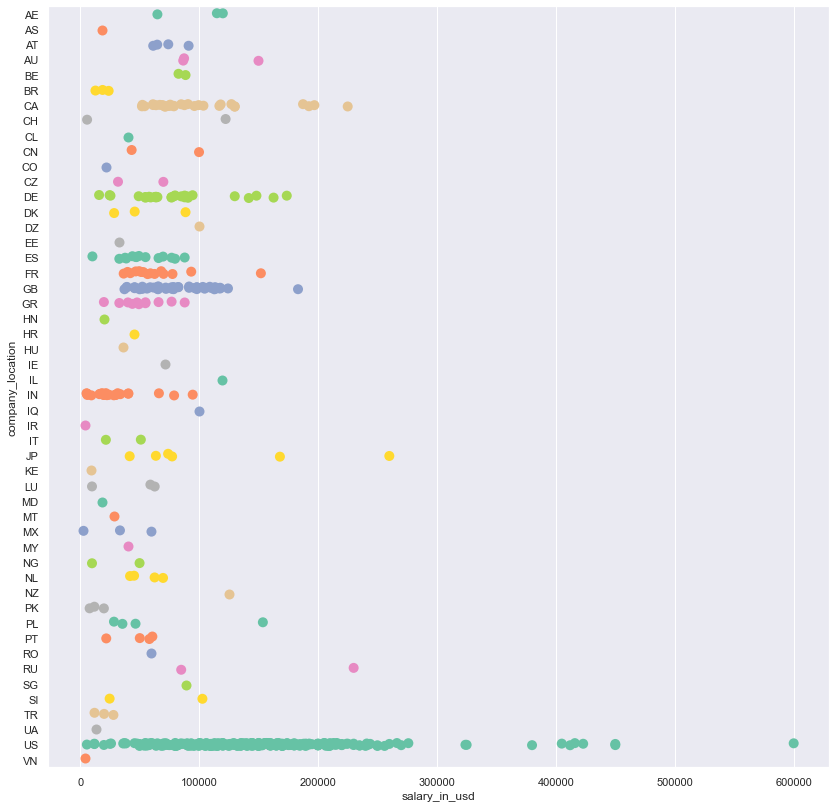

In [65]:
sns.stripplot(y = 'company_location', x = 'salary_in_usd', data = dsjobs, palette="Set2", s = 10)
sns.set(rc = {'figure.figsize':(14,14)})

#### It can be observed that majority of data science jobs are in United States of America (US) and it also has highest paying jobs. Canada (CA), Japan (JP), Germany (DE), United Kingdom (GB), Spain (ES), France (FR), Greece (GR) and India (IN) follows in terms of highest job salaries and number of jobs (except Japan) in that order respectively.

### Average salary as a function of currency

In [66]:
df = dsjobs[['salary_currency','salary_in_usd']].groupby(['salary_currency'], as_index=False).mean().set_index('salary_currency').reset_index().sort_values('salary_in_usd',ascending = False)
df = df.iloc[:15]
fig = px.bar(df, x='salary_currency', y='salary_in_usd', color = 'salary_currency',
            color_discrete_sequence=px.colors.qualitative.Safe,
            title = 'Average salary as a function of currency')
fig.update_layout(xaxis_title="Currency", yaxis_title="Mean Salary")
fig.show()

#### Taking average salaries as a function of currency reveals that people earn most in USD, followed by Swiss franc and Singapore dollar. This graph is heavily influenced by the value of a particular currency as most currencies on the left hand side of graph have relatively high value against USD.

### Average Salary as a function of Company location

In [67]:
df = dsjobs[['company_country','salary_in_usd']].groupby(['company_country'], as_index=False).mean().set_index('company_country').reset_index().sort_values('salary_in_usd',ascending = False)
df = df.iloc[:10]
fig = px.bar(df, x='company_country', y='salary_in_usd', color = 'company_country',
            color_discrete_sequence=px.colors.qualitative.Dark2,
            title = 'Average Salary as a function of Company location')
fig.update_layout(xaxis_title="Company Location", yaxis_title="Mean Salary")
fig.show()

#### The location of the company also plays a vital role in determining the mean salaries. The top 10 countries in terms of average salaries are plotted.

## Top 10 Data Science job positions

In [68]:
df = dsjobs["job_title"].value_counts().reset_index()
df = df.iloc[:10]
fig = px.pie(df, values='job_title', names='index', title= 'Distribution of job positions',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

#### It can be observed that Data Scientist is the most common job title followed by Data Engineers and Data Analysts respectively.

### Remote work preference/status as a function of time

In [69]:
remote_map = {0:'Work From Home',50:'Hybrid',100:'Office Work'}

dsjobs['remote_ratio_num'] = dsjobs['remote_ratio'].map(remote_map)

fig = px.choropleth(dsjobs,locationmode = "country names" ,locations = "company_country" , 
                    color="remote_ratio",hover_name="company_country" ,
                    hover_data = dsjobs[["salary_currency","remote_ratio","remote_ratio_num"]] ,
                    animation_frame="work_year" , color_continuous_scale = 'OrRd',
                    title = 'Remote work preference/status as a function of time')

fig.show()

#### Due to the Covid - 19 crisis, most jobs were shifted to Work from home modality, however as the vaccines started rolling out, everything starts retuning to the normalcy.

### WordCloud

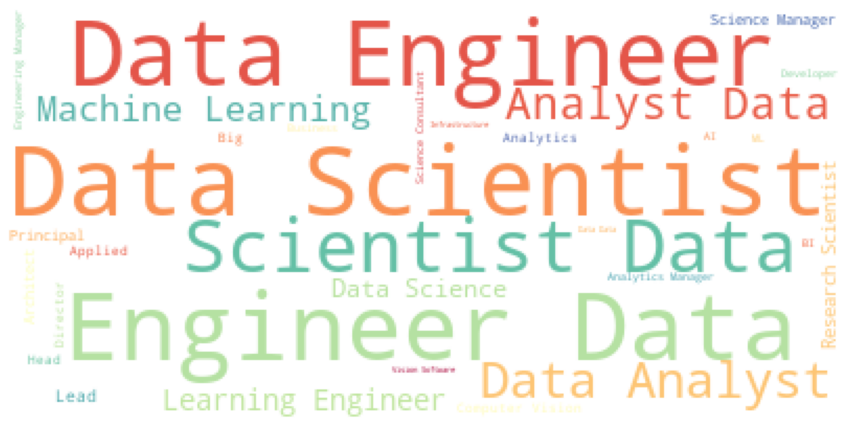

In [70]:
from wordcloud import WordCloud
text = " ".join(job_titles for job_titles in dsjobs["job_title"])
word_cloud = WordCloud(background_color = 'white', colormap = 'Spectral', min_font_size = 4).generate(text)
plt.figure(figsize = (15, 15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#### The word that appear most in the dataset are written in the bigger font while the ones that appear less are written in relatively smaller font. A collage of these words is created. 

## Inferences and Conclusion

A detailed data analysis is done for the given dataset of Data Science Job Salaries. It can be concluded that:

1. Data Science is one the most popular and emerging field in almost all industries such as Healthcare, Sports, Art, etc.
2. The variation of average salary of data scientists across the world are explored.
3. The variation of salaries across type of employment such as Contract basis, Full-time, etc is very crucial. 
4. The variation of salaries as you gain experience is a rising curve.
5. Owing to the Covid - 19 crisis, the work environment was shifted to Work from Home and back to normalcy as the time passed. 

## References and Future Work

All the useful link are listed below:
1. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
2. https://jovian.ai/
3. https://plotly.com/python/choropleth-maps/
4. https://plotly.com/